In [ ]:
#Mount Google drive to store Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set_style('darkgrid')
%matplotlib inline

Load dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Credit_Fraud/card_transdata.csv')

In [ ]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
# no null values in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

# 0 means no fraud , 1 indicates fraud.

In [ ]:
#replace 0,1 with fraud or no fraud
fraud_dict = {0 : 'No Fraud', 1 : 'Fraud'}
fraud_col = df.fraud.map(fraud_dict) 

In [ ]:
df.drop(columns='fraud',inplace = True)

In [ ]:
df['Fraud'] = fraud_col
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,Fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,No Fraud
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,No Fraud
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,No Fraud
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,No Fraud
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,No Fraud
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,No Fraud
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,No Fraud
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,No Fraud
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,No Fraud


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


In [ ]:
#pearson correlation coefficient 
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000


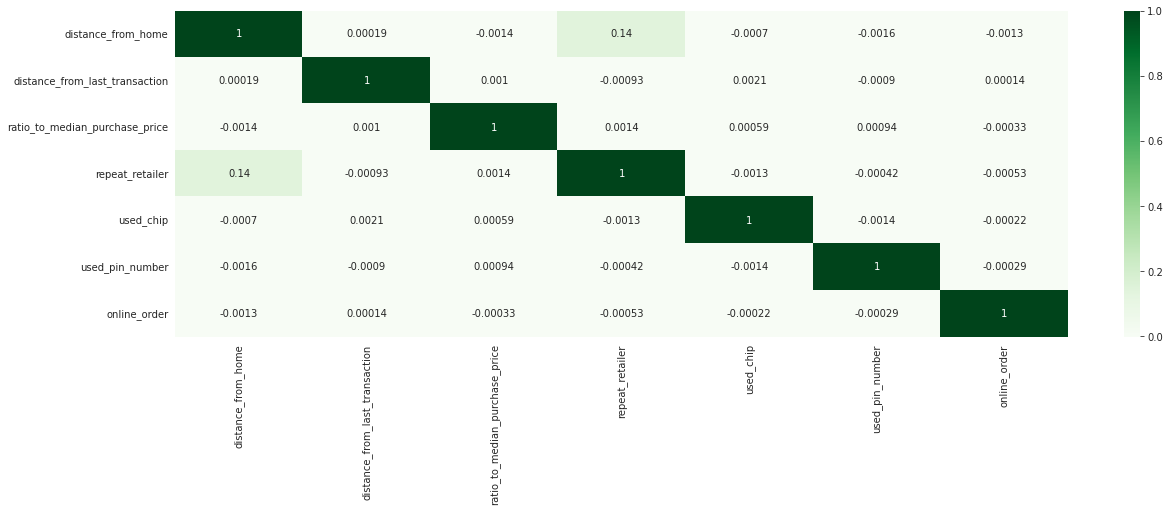

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

Defining Predictor and Label

In [ ]:
df_feature = df.iloc[: ,:-1]
df_label = df.iloc[:,-1]

In [ ]:
df_feat_col = list(df_feature.columns)
df_label_col = 'Fraud/No Fraud'
df_feat_col
df_label_col

'Fraud/No Fraud'

In [ ]:
df_label

0         No Fraud
1         No Fraud
2         No Fraud
3         No Fraud
4         No Fraud
            ...   
999995    No Fraud
999996    No Fraud
999997    No Fraud
999998    No Fraud
999999    No Fraud
Name: Fraud, Length: 1000000, dtype: object

In [ ]:
df_feature.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

Generating Train and Testing set

In [ ]:
#split training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(df_feature,df_label,test_size=0.30,random_state = 42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(700000, 7) (300000, 7) (700000,) (300000,)


In [ ]:
#normalise the features
scaled = StandardScaler().fit(X_train)
X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)

Training Logistic Regression Model

In [ ]:
#logistic Regression Model
log_reg_model = LogisticRegression(solver='newton-cg',max_iter=300)
log_reg_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=300, solver='newton-cg')

In [ ]:
log_reg_train_accu = log_reg_model.score(X_train_scaled,y_train)
print("Logistic regression training accuracy:",log_reg_train_accu)

Logistic regression training accuracy: 0.9590928571428572


In [ ]:
#predict probability of samples belongs to each class
log_reg_cl_prob = log_reg_model.predict_proba(X_train_scaled)
log_reg_cl_prob

array([[2.33127383e-05, 9.99976687e-01],
       [5.75557143e-01, 4.24442857e-01],
       [6.97356523e-02, 9.30264348e-01],
       ...,
       [4.78877362e-05, 9.99952112e-01],
       [4.03446792e-02, 9.59655321e-01],
       [3.66274560e-05, 9.99963373e-01]])

In [ ]:
#test accuracy
log_reg_test_acc = log_reg_model.score(X_test_scaled,y_test)

In [ ]:
print("test accuacy of logistic model:",log_reg_test_acc)

test accuacy of logistic model: 0.95862


In [ ]:
#predict label and plot confusion matrix
y_pred = log_reg_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred,normalize='true')
cm

array([[0.59990815, 0.40009185],
       [0.00715665, 0.99284335]])

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

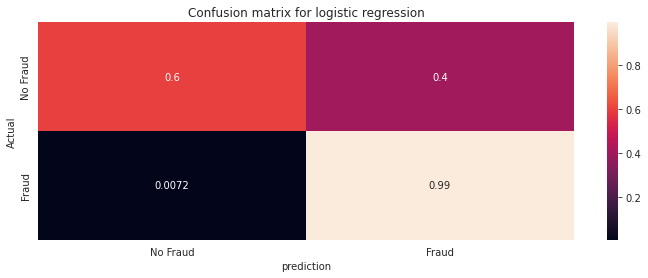

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(cm,
            annot=True,
            xticklabels=fraud_dict.values(),
            yticklabels=fraud_dict.values(),)
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Confusion matrix for logistic regression')

finding weight importance of dimensions

In [ ]:
#
log_reg_coeff = log_reg_model.coef_
log_reg_coeff = log_reg_coeff.reshape(7,)
log_reg_coeff

array([-0.99288266, -0.68858021, -2.41993485,  0.20027251,  0.49431901,
        4.09538941, -3.19953844])

In [ ]:
log_coeff_df = pd.DataFrame({'Columns':df_feature.columns,'coefficients':log_reg_coeff})
log_coeff_df.sort_values('coefficients',ascending=False)

,Columns,coefficients
5,used_pin_number,4.095389
4,used_chip,0.494319
3,repeat_retailer,0.200273
1,distance_from_last_transaction,-0.688580
0,distance_from_home,-0.992883
2,ratio_to_median_purchase_price,-2.419935
6,online_order,-3.199538


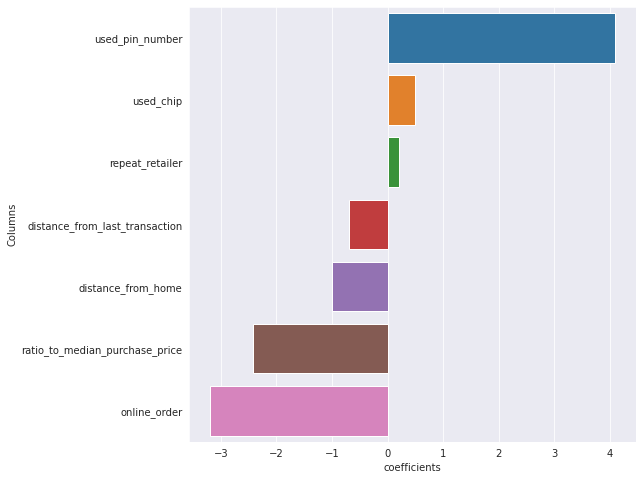

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=log_coeff_df.sort_values('coefficients',ascending=False), x = 'coefficients', y='Columns')

Hyperparameter tuning

In [ ]:
#Class weight
log_reg_model.classes_

array(['Fraud', 'No Fraud'], dtype=object)

In [ ]:

log_reg_cl_wg = LogisticRegression(class_weight = {'No Fraud':1,'Fraud':3},solver='liblinear' )
log_reg_cl_wg.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={'Fraud': 3, 'No Fraud': 1}, solver='liblinear')

In [ ]:
log_reg_cl_wg_train_accu = log_reg_cl_wg.score(X_train_scaled,y_train)
log_reg_cl_wg_test_accu = log_reg_cl_wg.score(X_test_scaled,y_test)

In [ ]:
print("training acc:",log_reg_cl_wg_train_accu,"test accu:",log_reg_cl_wg_test_accu)

training acc: 0.9625285714285714 test accu: 0.96198


#Prediction on made up data

In [ ]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,Fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,No Fraud
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,No Fraud
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,No Fraud
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,No Fraud
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,No Fraud
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,No Fraud
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,No Fraud
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,No Fraud
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,No Fraud


In [ ]:
made_up_input1 = {'distance_from_home':24.347021,
'distance_from_last_transaction': 2.146031, 'ratio_to_median_purchase_price': 6.602498,
'repeat_retailer':1.0, 'used_chip':0.0, 'used_pin_number':1.0, 'online_order':1.0}

In [ ]:
def input_func(input):
  new_input_df = pd.DataFrame([input])
  
  new_input_df=scaled.transform(new_input_df)
  pred = log_reg_cl_wg.predict(new_input_df)[0]
  #print(pred)
  prob=log_reg_cl_wg.predict_proba(new_input_df)[0][list(log_reg_cl_wg.classes_).index(pred)]
  return pred,prob

In [ ]:
input_func(made_up_input1)

('No Fraud', 0.9997785922537483)

In [ ]:
made_up_input2 = {'distance_from_home':25.347021,
'distance_from_last_transaction': 3.146031, 'ratio_to_median_purchase_price': 5.602498,
'repeat_retailer':1.0, 'used_chip':0.0, 'used_pin_number':0.0, 'online_order':1.0}

In [ ]:
input_func(made_up_input2)

('Fraud', 0.8960053069749491)

Save Model

In [ ]:
import joblib

In [ ]:
credit_card_fraud_det_model = {'model':log_reg_cl_wg,'scaled':scaled,'df_feature_col':df_feat_col
                               ,'df_label_col':df_label_col}

In [ ]:
joblib.dump(credit_card_fraud_det_model,'credit_card_fraud_detection')

['credit_card_fraud_detection']

In [ ]:
credit_card_fraud_det_model2 = joblib.load('credit_card_fraud_detection')
credit_card_fraud_det_model2

{'df_feature_col': ['distance_from_home',
  'distance_from_last_transaction',
  'ratio_to_median_purchase_price',
  'repeat_retailer',
  'used_chip',
  'used_pin_number',
  'online_order'],
 'df_label_col': 'Fraud/No Fraud',
 'model': LogisticRegression(class_weight={'Fraud': 3, 'No Fraud': 1}, solver='liblinear'),
 'scaled': StandardScaler()}